# Deep Learning

## Shallow and Deep Networks

(1000, 2)


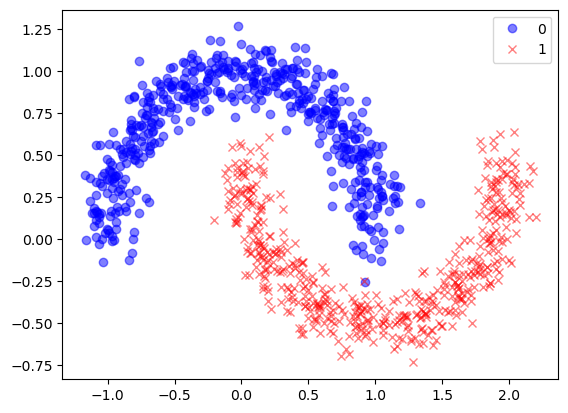

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

# create datset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# data exploration
print(X.shape)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.show()

## Shallow Model

In [2]:
# create model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='shallow_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=200, verbose=0)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [3]:
results = model.evaluate(X_test, y_test)
print("The Accuracy score on the train set is:\t{:0.3f}".format(results[1]))

10/10 [==============================] - 0s 906us/step - loss: 0.3172 - accuracy: 0.8433
The Accuracy score on the train set is:	0.843


319/319 [==============================] - 0s 672us/step


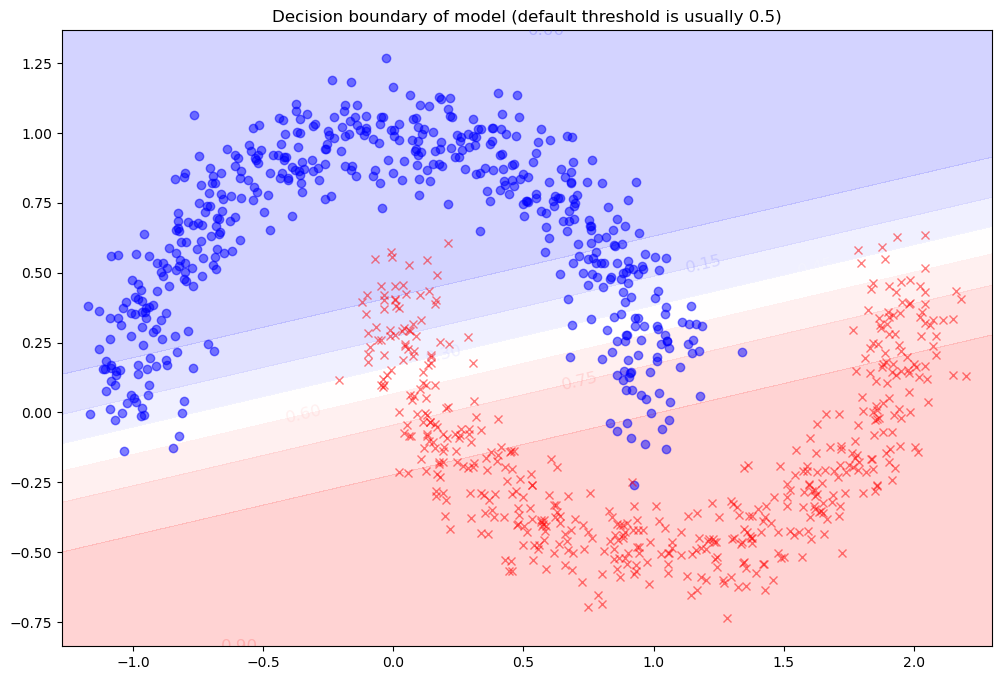

In [4]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    CS = plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.title("Decision boundary of model (default threshold is usually 0.5)")
    
plot_decision_boundary(model, X, y)

The shallow model doesn't work, because it is performing linear regression. This does not fit the patterns in the data

## Deep model

In [5]:
# create model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='deep_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=100, verbose=0)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [6]:
# evaluate
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015368154272437096, 1.0]

In [7]:
threshold = 0.5
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred > threshold

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred > threshold

print("The Accuracy score on the train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

10/10 [==============================] - 0s 905us/step
The Accuracy score on the train set is:	0.999
The Accuracy score on the test set is:	1.000


319/319 [==============================] - 0s 712us/step


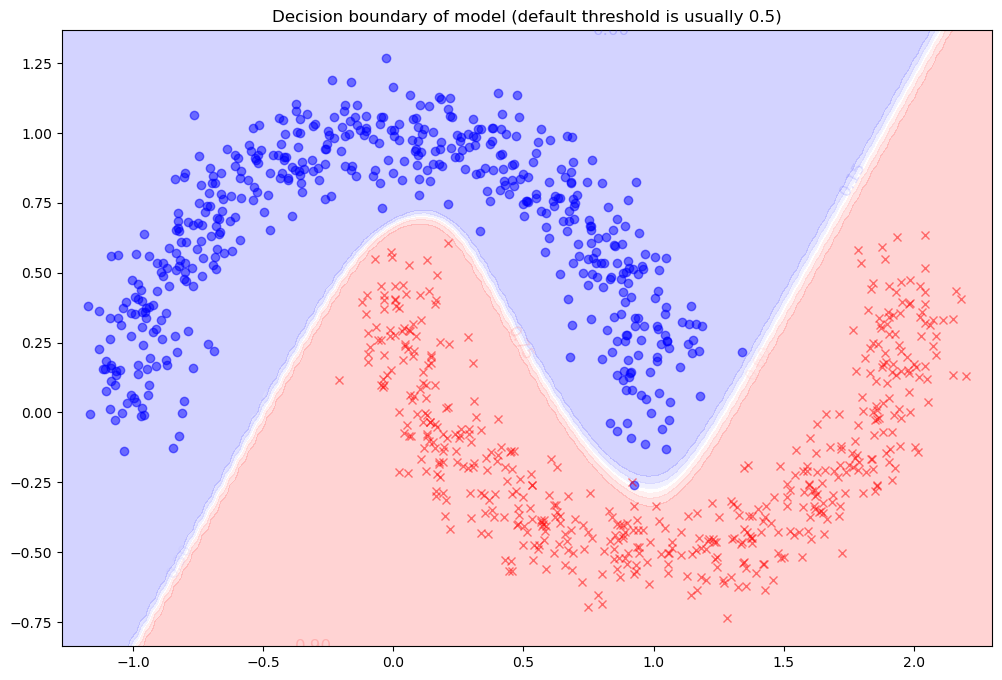

In [8]:
plot_decision_boundary(model, X, y)

## Multi-class classification with the Iris dataset

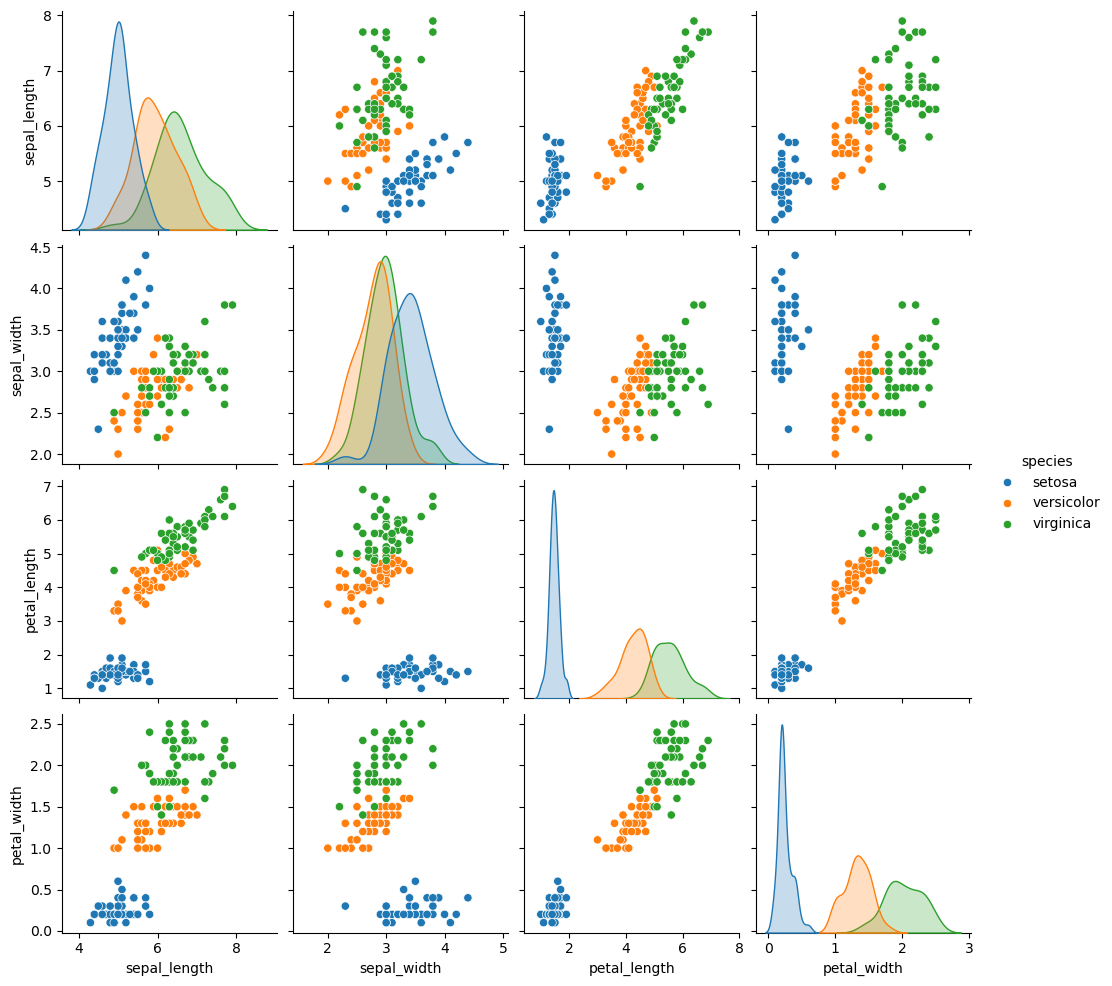

In [9]:
# read dataset
df = pd.read_csv('iris.csv')

# data exploration
sns.pairplot(df, hue="species")

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# feature engineering
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# easier alternative for transforming strings to numerical labels is to use sklearn.preprocessing.LabelEncoder()
target_names = df['species'].unique()
print(target_names)

target_dict = {n:i for i, n in enumerate(target_names)}
print(target_dict)
y = df['species'].map(target_dict) 

y.head()

['setosa' 'versicolor' 'virginica']
{'setosa': 0, 'versicolor': 1, 'virginica': 2}


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [13]:
# easier alternative for one-hot encoding is to use pandas.get_dummies()
from tensorflow.keras.utils import to_categorical 
y_cat = to_categorical(y)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2, random_state=42)

In [15]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/20
4/4 [==============================] - 0s 48ms/step - loss: 7.3504 - accuracy: 0.3519 - val_loss: 5.5515 - val_accuracy: 0.1667
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 3.3148 - accuracy: 0.3519 - val_loss: 1.2729 - val_accuracy: 0.5833
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 1.0658 - accuracy: 0.4907 - val_loss: 0.8615 - val_accuracy: 0.4167
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 1.2505 - accuracy: 0.3981 - val_loss: 1.0681 - val_accuracy: 0.4167
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 1.4465 - accuracy: 0.3426 - val_loss: 0.8923 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 1.1347 - accuracy: 0.3704 - val_loss: 0.7414 - val_accuracy: 0.5000
Epoc

In [16]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.2), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Epoch 1/20
4/4 [==============================] - 0s 56ms/step - loss: 3.9417 - accuracy: 0.3056 - val_loss: 3.0040 - val_accuracy: 0.4167
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 2.6181 - accuracy: 0.3426 - val_loss: 1.1489 - val_accuracy: 0.5833
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 1.1923 - accuracy: 0.6481 - val_loss: 1.6893 - val_accuracy: 0.5833
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 0.9840 - accuracy: 0.6667 - val_loss: 1.0124 - val_accuracy: 0.5833
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.8184 - accuracy: 0.6759 - val_loss: 0.5623 - val_accuracy: 0.8333
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.6190 - accuracy: 0.7407 - val_loss: 0.9255 - val_accuracy: 0.5833
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7130 - val_loss: 0.7913 - val_accuracy: 0.5833
Epoch 8/20
4/4 [=================

In [17]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/20
4/4 [==============================] - 0s 43ms/step - loss: 2.4905 - accuracy: 0.3611 - val_loss: 1.6115 - val_accuracy: 0.5833
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 1.3541 - accuracy: 0.6667 - val_loss: 1.1748 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 0s 8ms/step - loss: 0.9938 - accuracy: 0.2870 - val_loss: 1.0066 - val_accuracy: 0.5833
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 0.7285 - accuracy: 0.6111 - val_loss: 0.9496 - val_accuracy: 0.4167
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.6481 - val_loss: 0.8153 - val_accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.5926 - val_loss: 0.7094 - val_accuracy: 0.5833
Epoch 7/2

In [18]:
# evaluate model
y_pred = model.predict(X_test)
print(f'\n\n{y_pred[:5]}')

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(f'\n\n{y_pred_class[:5]}')

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

print('\n\nconfusion matrix:')
confusion_matrix(y_test_class, y_pred_class)

1/1 [==============================] - 0s 35ms/step


[[1.1723614e-02 7.1047258e-01 2.7780375e-01]
 [9.7963035e-01 2.0311464e-02 5.8157195e-05]
 [7.7083878e-06 5.6037329e-02 9.4395500e-01]
 [9.9551165e-03 6.2232155e-01 3.6772338e-01]
 [1.2586332e-02 6.3560420e-01 3.5180950e-01]]


[1 0 2 1 1]


classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



confusion matrix:


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# Excercise 2.3
How many layers does the NN have?
- 1 layer(3 als in/output ook worden meegeteld)

Why does the model use softmax as an activation function?
- Softmax is an activation function for multiclass classification. The iris dataset has three classes.

Investigate the influence of the hyperparameter learning rate on the learning performance.
- the accuracy goes down when lowering the learning rate. The accuracy goes up when increasing the learning rate, up until a learning rate of 0.3, where it starts to lower the accuracy again.

Does the model overfit?
- On higher learning rates the model scores lower, indicating that the model is capable of overfitting.

The classification report shows precision, recall and f1-score. Explain these values. Draw conclusions about the reliability of the classification, based on the values in the classification report.
- The report shows a precision of 1 for all classes except class 2, indicating that only entries that are supposed to be class 2 were guessed wrong. 
- The report also shows that only class 1 has a recall of below 1, meaning that the wrongly predicted entries of class 2 were predicted to be class 1. 
- The report also shows that there is a 97% on a test set size of 30, meaning that only one entry was guessed wrong.

What can you learn from the confusion report?
- The incorrect prediction was indeed a class 1 that was predicted to be a class 2.

## Questions about Iris classification

* Why do we perform one-hot encoding of the label y during the feature engineering step?
* Why do we use np.argmax() during the evaluation step?

# Perform on own dataset

In [116]:
df = pd.read_csv('Pokemon.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# remove all entries that where the name contains the full words 'Mega', 'Gigantamax' or 'Primal'
# this is to remove all the special forms of the pokemons that generally have higher stats
# and would make the classification problem too vague
df = df[~df['name'].str.contains('Mega')]
df = df[~df['name'].str.contains('Gigantamax')]
df = df[~df['name'].str.contains('Primal')]
# remove all legendary pokemons with a base total of lower than 580
# this is to remove weaker versions of legendary pokemon
df = df[~((df['legendary'] == True) & (df['total'] < 580))] 
df = df.reset_index(drop=True)

train, test = train_test_split(df, test_size=0.3, stratify=df['legendary'], random_state=42)
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total']
X_train = train[features]
y_train = train['legendary']
X_test = test[features]
y_test = test['legendary']

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

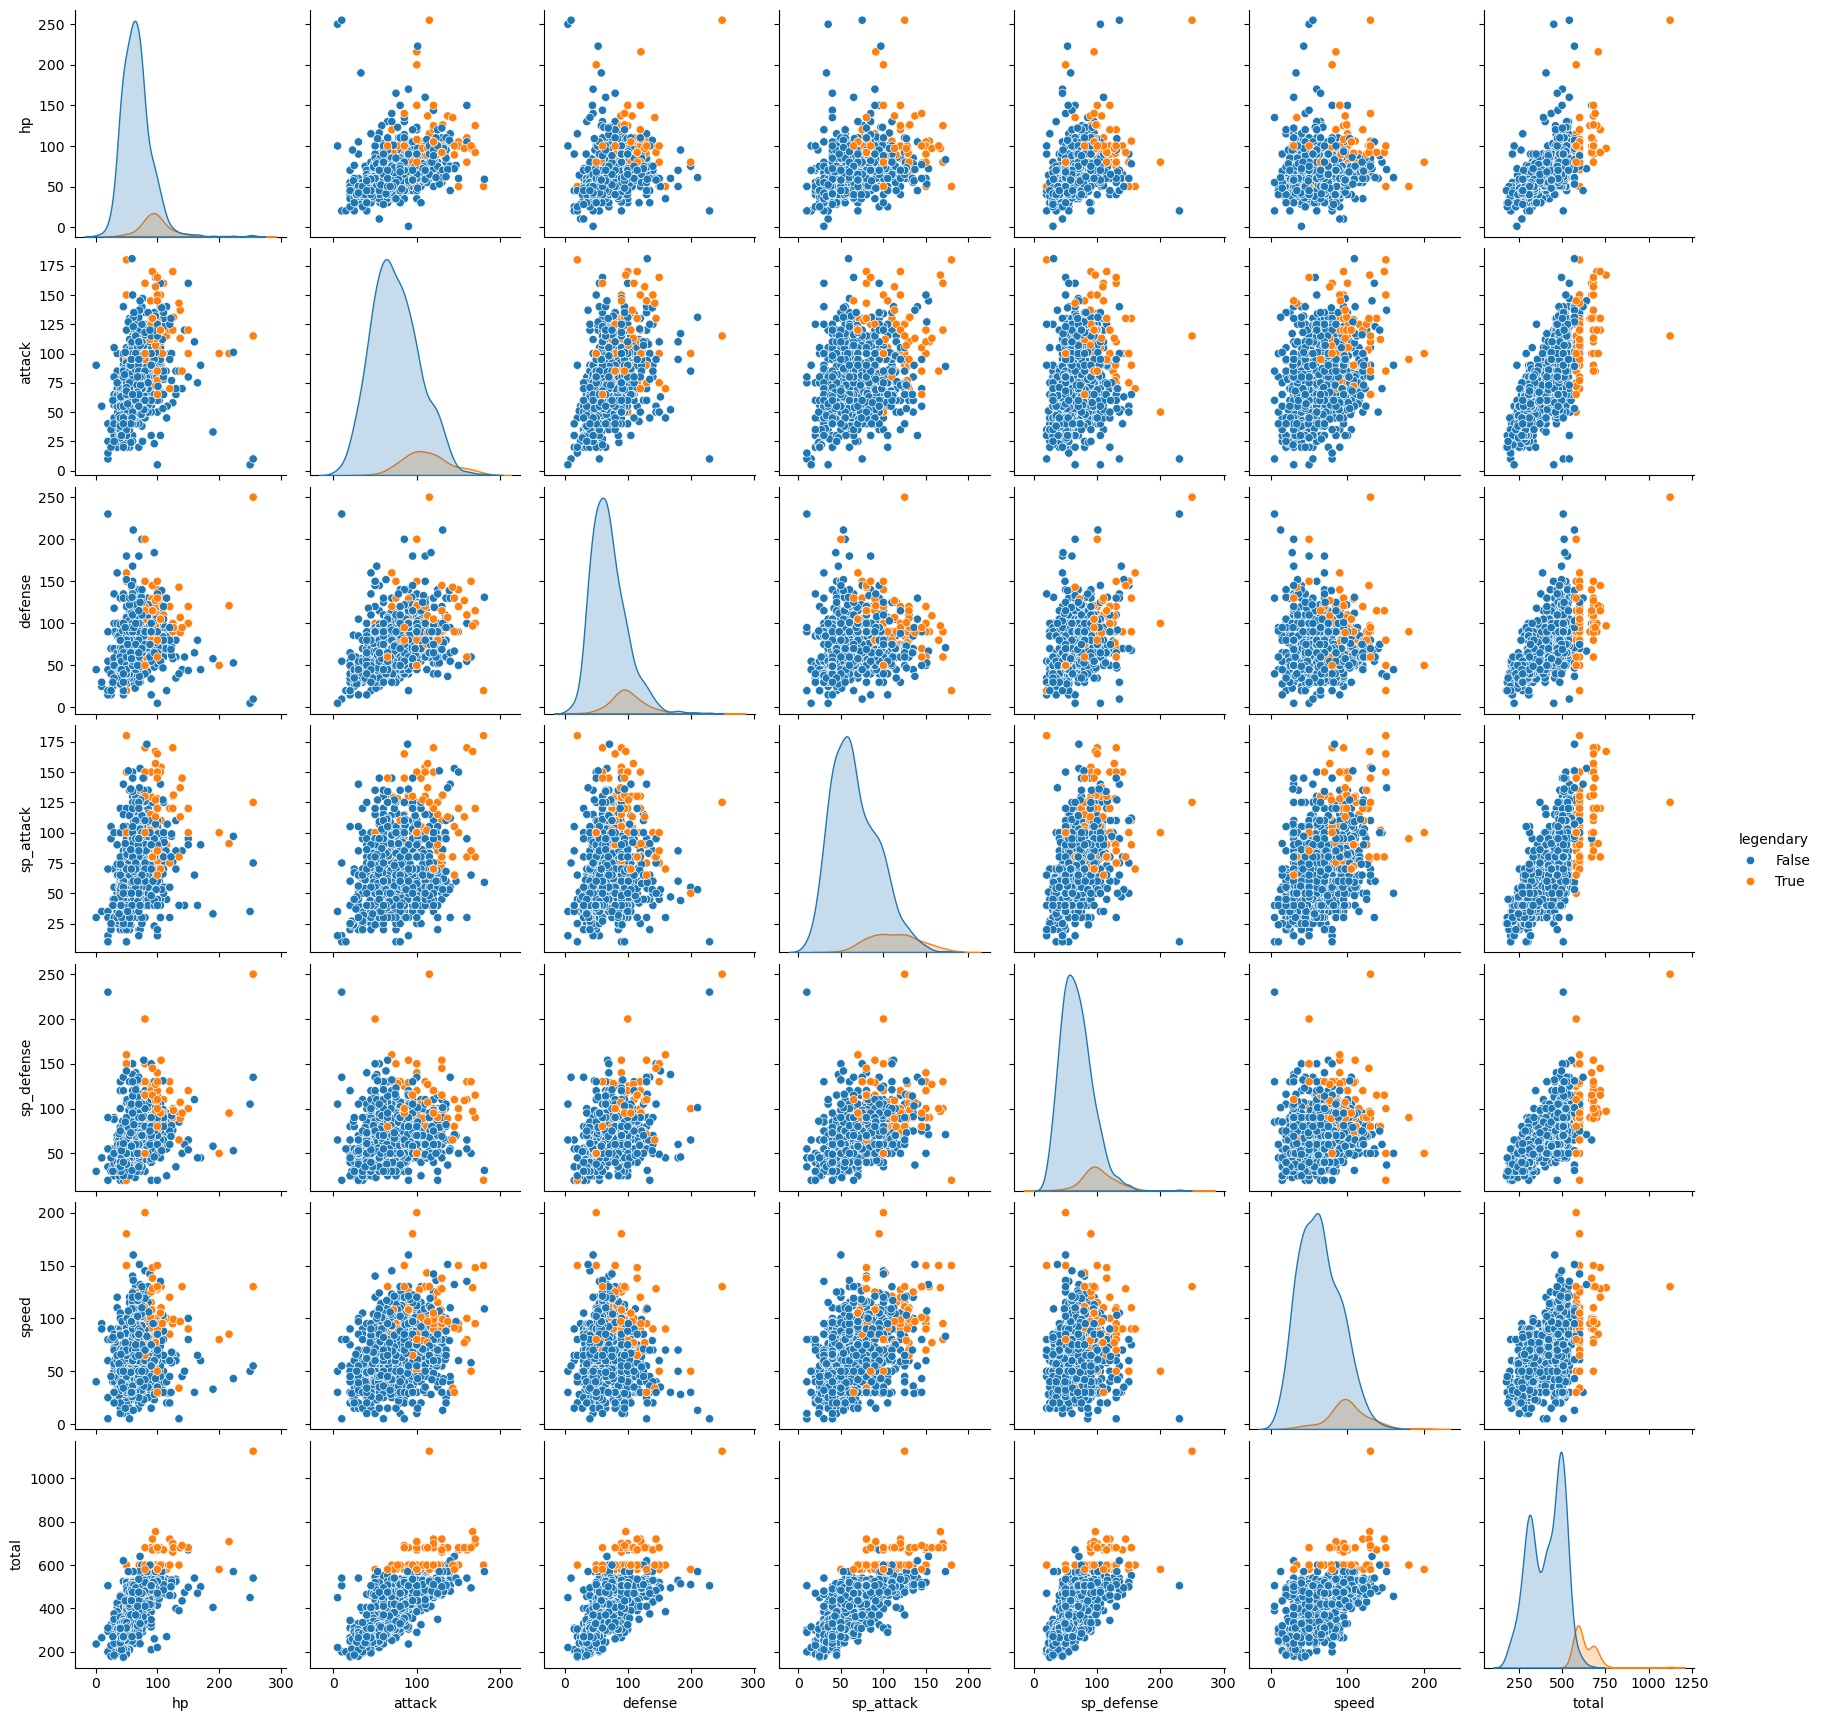

In [117]:
pairplot_colums = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total', 'legendary']
sns.pairplot(df[pairplot_colums], hue='legendary')

In [118]:
# Create a model
model = Sequential()
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.001), 'binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 0.5391 - accuracy: 0.8954 - val_loss: 0.4390 - val_accuracy: 0.9051
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.9028 - val_loss: 0.3267 - val_accuracy: 0.9051
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9028 - val_loss: 0.2624 - val_accuracy: 0.9051
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9083 - val_loss: 0.2271 - val_accuracy: 0.9124
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9339 - val_loss: 0.2013 - val_accuracy: 0.9489
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9578 - val_loss: 0.1826 - val_accuracy: 0.9489
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9578 - val_loss: 0.1681 - val_accuracy: 0.9489
Epoch 8/100
1

In [119]:
# evaluate model
# scale X_test
X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(bool).flatten()

print(f'\n\n{y_pred_class[:5]}')

print('\n\nclassification report:')
print(classification_report(y_test, y_pred_class))

print('\n\nconfusion matrix:')
print(confusion_matrix(y_test, y_pred_class))


10/10 [==============================] - 0s 1ms/step


[False False False False  True]


classification report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       265
        True       0.88      0.75      0.81        28

    accuracy                           0.97       293
   macro avg       0.92      0.87      0.89       293
weighted avg       0.96      0.97      0.96       293



confusion matrix:
[[262   3]
 [  7  21]]


In [120]:
# show the false positives and false negatives sorted by legendary status
test['predicted'] = y_pred_class
test[test['legendary'] != test['predicted']].sort_values('legendary')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,predicted
845,773,Silvally,Normal,NaN,570,95,95,95,95,95,95,7,False,True
481,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,True
764,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False,True
785,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,False
273,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True,False
969,894,Regieleki,Electric,NaN,580,80,100,50,100,50,200,8,True,False
419,386,Deoxys Defense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,False
970,895,Regidrago,Dragon,NaN,580,200,100,50,100,50,80,8,True,False
784,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,False
418,386,Deoxys Attack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,False


In [121]:
# show the true positives
test[(test['legendary'] == 1) & (test['predicted'] == 1)]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,predicted
694,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True,True
533,492,Shaymin Land Forme,Grass,NaN,600,100,100,100,100,100,100,4,True,True
411,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True,True
410,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True,True
527,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True,True
858,791,Solgaleo,Psychic,Steel,680,137,137,107,113,89,97,7,True,True
973,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True,True
534,492,Shaymin Sky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True,True
526,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True,True
699,646,White Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True,True
